## Весь набор

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('water.csv')
df.columns=['location', 'town', 'mortality', 'hardness']
df.head()

,location,town,mortality,hardness
0,North,Birkenhead,1668,17
1,South,Birmingham,1466,5
2,North,Blackburn,1800,14
3,North,Blackpool,1609,18
4,North,Bolton,1558,10


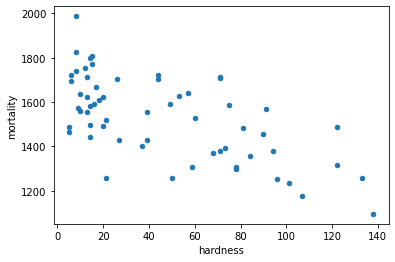

In [2]:
df.plot(kind='scatter', x='hardness', y='mortality')

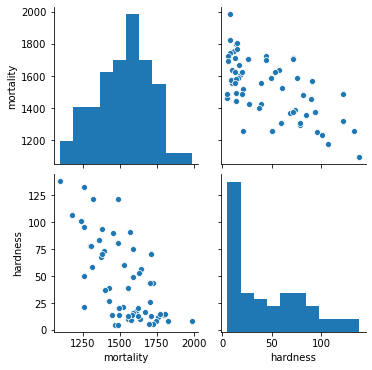

In [3]:
sns.pairplot(df)

In [4]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.641232
mortality,-0.641232,1.000000


In [5]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.615123
mortality,-0.615123,1.000000


In [6]:
X = df[['hardness']]
y = df['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [7]:
model.coef_

array([-3.20080488])

In [8]:
model.intercept_

1677.9264365937627

In [9]:
y_pred = model.predict(X_test)

In [10]:
model.score(X_test, y_test) 

0.5194079066802483

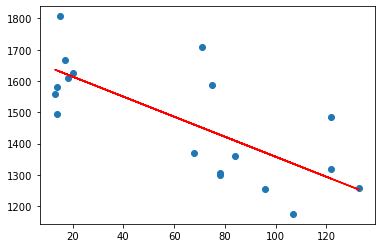

In [11]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

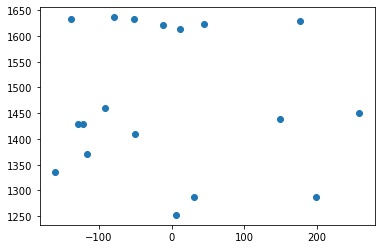

In [12]:
residuals = y_test - y_pred
plt.scatter(residuals, y_pred)

## Север

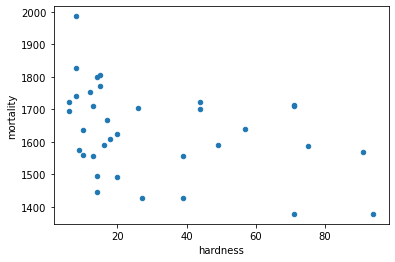

In [13]:
df_north = df.loc[df.location == 'North']
df_north.plot(kind='scatter', x='hardness', y='mortality')

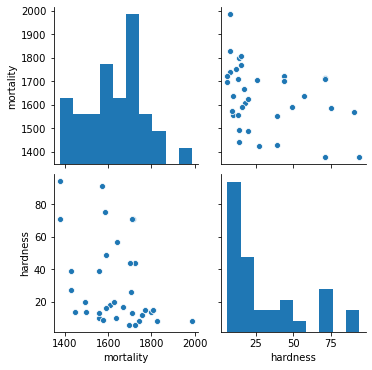

In [14]:
sns.pairplot(df_north)

In [15]:
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [16]:
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [17]:
X = df_north[['hardness']]
y = df_north['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [19]:
model.coef_

array([-1.97686226])

In [20]:
model.intercept_

1688.150229031281

In [21]:
y_pred = model.predict(X_test)

In [22]:
model.score(X_test, y_test)

0.018885304285745863

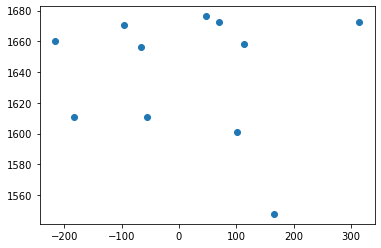

In [23]:
residuals = y_test - y_pred
plt.scatter(residuals, y_pred)

## Юг

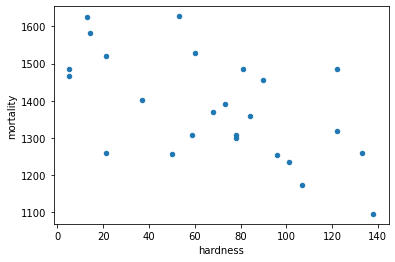

In [24]:
df_south = df.loc[df.location == 'South']
df_south.plot(kind='scatter', x='hardness', y='mortality')

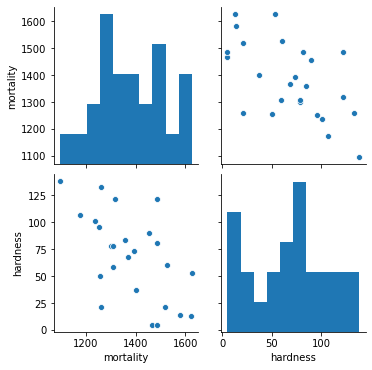

In [25]:
sns.pairplot(df_south)

In [26]:
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.588355
mortality,-0.588355,1.000000


In [27]:
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.571704
mortality,-0.571704,1.000000


In [28]:
X = df_south[['hardness']]
y = df_south['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [29]:
model.coef_

array([-2.73749925])

In [30]:
model.intercept_

1569.4205391733744

In [31]:
y_pred = model.predict(X_test)

In [32]:
model.score(X_test, y_test) 

0.05029320252980818

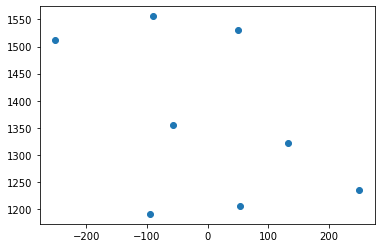

In [35]:
residuals = (y_test - y_pred)
plt.scatter(residuals, y_pred)

## Вывод

Вычисления для всего набора данных показали, что между жесткостью воды и смертностью существует обратная связь средней силы (коэффициент Пирсона — -0,64; коэффициент Спирмена — -0,62). Другими словами, чем ниже жесткость воды, тем выше смертность. При этом повышение жесткости воды на 1 в среднем приводит к понижению смертности на 3,2 человека. С учетом коэффициента детерминации (0,52) можно сделать вывод о том, что модель является адекватной. Кроме того, хаотичный график остатков свидетельствует о том, что линейная регрессия в качестве рабочего метода была выбрана правильно.    

Отдельные расчеты для севера и юга в целом повторяют тенденции общего набора: север — в меньшей степени (коэффициент Пирсона и коэффициент Спирмена указывают на обратную связь меньшей силы: -0,37 и -0,4 соответственно), юг — в большей степени (его коэффициенты близки к общим: -0,59 и -0,57). Однако эти две модели едва ли лучше вычислений средних значений — коэффициенты детерминации для севера и юга почти нулевые (0,05 и 0,019). 

Вывод о том, что чем выше жесткость воды, тем ниже смертность, является странным, на первый взгляд. Но если посмотреть на диапазон значений жесткости воды в нашем наборе данных (от 5 до 138 СаСО3 на мг/л) и нормативные показатели (согласно BritishWater.co uk: 0-50 — мягкая, 51-100 — умеренно мягкая, 101-150 — слегка жесткая, 151-200 — умеренно жетская, 201-300 — жесткая, свыше 300 — очень жесткая), то оказывается, что все исследуемые значения лежат в пределах нормы с преобладанием категорий "мягкая" и "умеренно мягкая" (лишь около 10 % случаев описывают слегка жесткую воду). То есть во всех случаях мы имели дело со "здоровой" водой. 

Возможно, что обнаруженная корреляция между жесткостью и смертностью в изученном наборе является случайной, либо связь присутствует, но в том числе и через другие факторы, либо же жителям страны действительно нужна вода пожестче, например, умеренной жесткости (с более высоким содержанием карбоната кальция).   